In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Uber Request Data (1).csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
len(df["Request id"].unique())

6745

In [4]:
df.shape      # in req id col , there is no duplicate

(6745, 6)

In [5]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
df.isnull().sum() / df.shape[0] * 100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [8]:
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 8:37         6
11/7/2016 17:57        6
11/7/2016 9:40         6
12/7/2016 19:17        5
                      ..
14-07-2016 11:04:55    1
15-07-2016 17:35:52    1
14-07-2016 20:09:49    1
14-07-2016 17:23:33    1
13-07-2016 21:36:57    1
Name: Request timestamp, Length: 5618, dtype: int64

In [9]:
df["Request timestamp"].astype(str)

0           11/7/2016 11:51
1           11/7/2016 17:57
2            12/7/2016 9:17
3           12/7/2016 21:08
4       13-07-2016 08:33:16
               ...         
6740    15-07-2016 23:49:03
6741    15-07-2016 23:50:05
6742    15-07-2016 23:52:06
6743    15-07-2016 23:54:39
6744    15-07-2016 23:55:03
Name: Request timestamp, Length: 6745, dtype: object

In [10]:
df["Request timestamp"].replace("/", "-")

0           11/7/2016 11:51
1           11/7/2016 17:57
2            12/7/2016 9:17
3           12/7/2016 21:08
4       13-07-2016 08:33:16
               ...         
6740    15-07-2016 23:49:03
6741    15-07-2016 23:50:05
6742    15-07-2016 23:52:06
6743    15-07-2016 23:54:39
6744    15-07-2016 23:55:03
Name: Request timestamp, Length: 6745, dtype: object

In [11]:
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"], dayfirst=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [13]:
df["Request timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [14]:
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"], dayfirst=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [16]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [17]:
req_hour = df['Request timestamp'].dt.hour

In [18]:
len(req_hour)

6745

In [19]:
df["req_hour"] = req_hour

In [20]:
req_day = df['Request timestamp'].dt.day

In [21]:
df['req_day'] = req_day

In [22]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


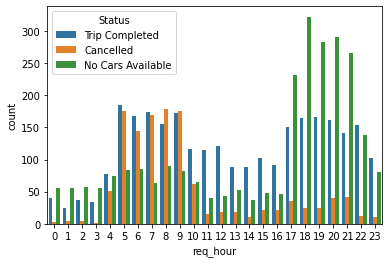

In [24]:
sns.countplot(x = "req_hour", data=df, hue="Status")
plt.show()

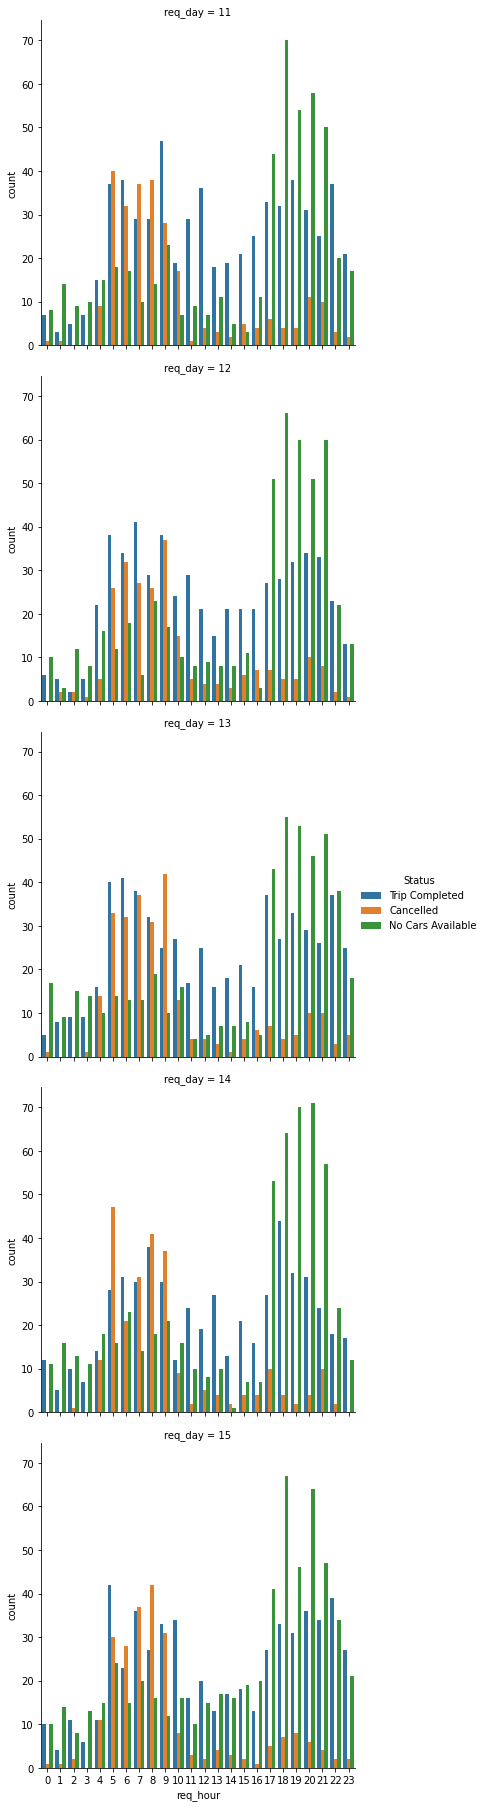

In [25]:
sns.catplot(x="req_hour", data=df, row="req_day", hue="Status", kind="count")

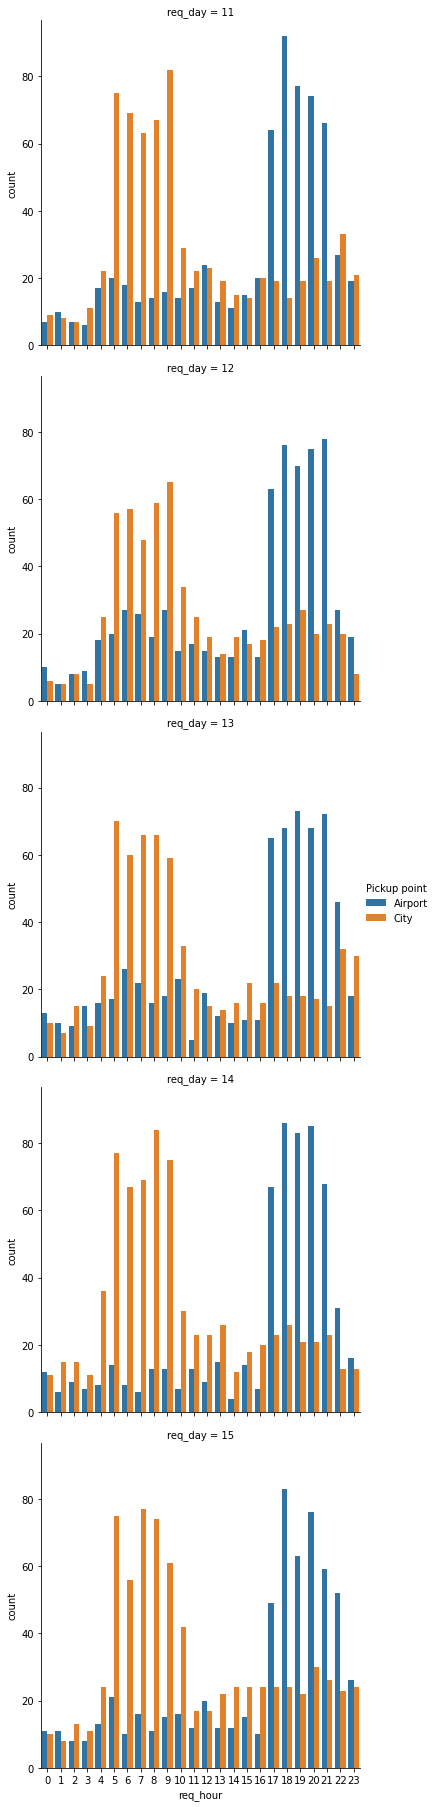

In [26]:
sns.catplot(x="req_hour", data=df, row="req_day", hue="Pickup point", kind="count")

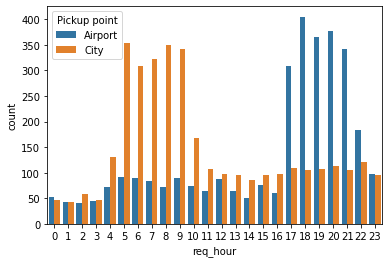

In [27]:
sns.countplot(x = "req_hour", data=df, hue="Pickup point")
plt.show()

#### <5 ==  "Pre Morning"
####  5<x<10==     "Morning Rush"
####  10<=x<17==     "Day_Time"
####  17<=x<22==        "Evening Rush"
####  else      ==     "Late Night"

In [28]:
df['Time_Slot'] = 0

In [29]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0


In [30]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

In [31]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [32]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

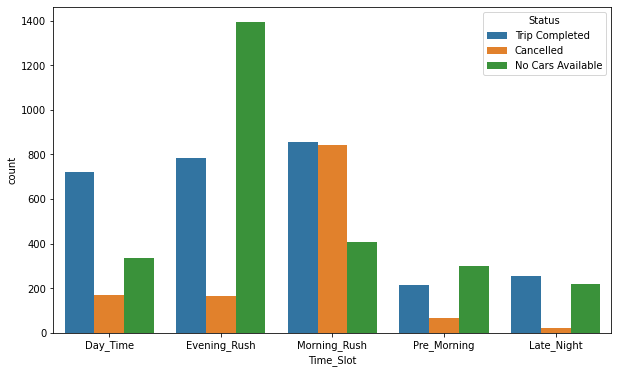

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x = "Time_Slot", data=df, hue='Status')
plt.show()

In [34]:
df_morning_rush = df[df["Time_Slot"]=="Morning_Rush"]

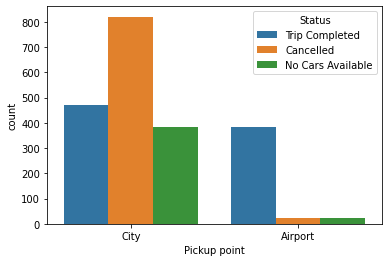

In [35]:
sns.countplot(x='Pickup point', data=df_morning_rush, hue='Status')

### Severity of problem by location and their count (cancellation of cab as per the pickup location at morning rush hours)

In [36]:
df_airport_cancelled = df_morning_rush.loc[(df_morning_rush['Pickup point']=='Airport') & (df_morning_rush['Status']=='Cancelled')]

In [37]:
df_airport_cancelled.shape[0]

23

In [38]:
df_city_cancelled = df_morning_rush.loc[(df_morning_rush['Pickup point']=='City') & (df_morning_rush['Status']=='Cancelled')]

In [39]:
df_city_cancelled.shape[0]

820

### Supply and demand

In [40]:
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


### Morning Rush -- City

In [41]:
df_morning_rush.loc[df_morning_rush['Pickup point']=='City'].shape[0] # supply

1677

In [42]:
df_morning_rush.loc[(df_morning_rush['Pickup point']=='City') & (df_morning_rush['Status']=='Cancelled')].shape[0]   

820

In [43]:
df_morning_rush.loc[(df_morning_rush['Pickup point']=='City') & (df_morning_rush['Status']=='Trip Completed')].shape[0]       # Demand

472

In [44]:
df_morning_rush.loc[(df_morning_rush['Pickup point']=='City') & (df_morning_rush['Status']=='No Cars Available')].shape[0]   

385

### Morning Rush -- Airport

In [45]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0] #supply

426

In [46]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0] 

23

In [47]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0] #Demand

382

In [48]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

### Evening Rush Overview

In [49]:
df_evening_rush = df[df['Time_Slot']=='Evening_Rush']

In [50]:
df_city_cancelled = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

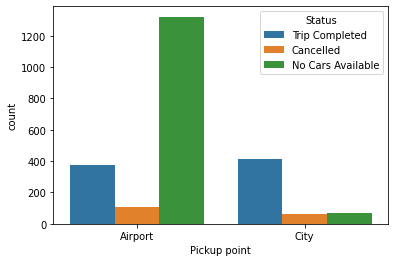

In [51]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [52]:
df_city_cancelled.shape[0]

60

In [53]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

### Evening Rush -- City

In [54]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [55]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

In [56]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [57]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

### Evening Rush -- Airport

In [58]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [59]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [60]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [61]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

### Pie Chart for Morning Rush - City

In [74]:
df_morning_city = df.loc[(df['Pickup point']=='City') & (df['Time_Slot']=='Morning_Rush')]

In [75]:
df_morning_city

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning_Rush
30,1826,City,4.0,Trip Completed,2016-07-12 09:27:00,2016-07-12 10:27:00,9,12,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [76]:
df_morning_city_count = pd.DataFrame(df_morning_city['Status'].value_counts())

In [77]:
df_morning_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [78]:
df_morning_city_count['Status'].values

array([820, 472, 385])

In [79]:
df_morning_city_count['Status'].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

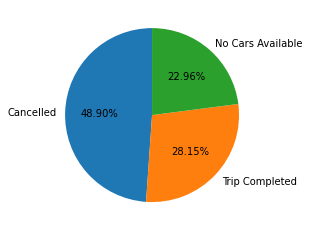

In [80]:
fig,ax=plt.subplots()
ax.pie(df_morning_city_count["Status"].values, labels=df_morning_city_count["Status"].index,
       autopct="%.2f%%", startangle=90)
plt.show() 

### Pie Chart for Evening Rush - Airport

In [81]:
df_evening_airport = df.loc[(df['Pickup point']=='City') & (df['Time_Slot']=='Evening_Rush')]

In [82]:
df_evening_airport

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening_Rush
25,5254,City,3.0,Trip Completed,2016-07-14 21:23:03,2016-07-14 22:25:19,21,14,Evening_Rush
40,1179,City,5.0,Trip Completed,2016-07-11 20:58:00,2016-07-11 21:45:00,20,11,Evening_Rush
43,2559,City,5.0,Trip Completed,2016-07-12 21:32:00,2016-07-12 22:29:00,21,12,Evening_Rush
52,3882,City,6.0,Trip Completed,2016-07-13 21:53:03,2016-07-13 22:45:24,21,13,Evening_Rush
...,...,...,...,...,...,...,...,...,...
6626,6522,City,NaN,No Cars Available,2016-07-15 20:46:49,NaT,20,15,Evening_Rush
6640,6542,City,NaN,No Cars Available,2016-07-15 20:55:46,NaT,20,15,Evening_Rush
6662,6585,City,NaN,No Cars Available,2016-07-15 21:23:24,NaT,21,15,Evening_Rush
6669,6591,City,NaN,No Cars Available,2016-07-15 21:32:55,NaT,21,15,Evening_Rush


In [83]:
df_evening_airport_count = pd.DataFrame(df_evening_airport['Status'].value_counts())

In [84]:
df_evening_airport_count

,Status
Trip Completed,411
No Cars Available,71
Cancelled,60


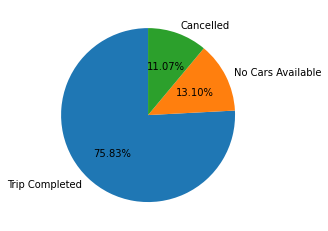

In [85]:
fig,ax=plt.subplots()
ax.pie(df_evening_airport_count["Status"].values, labels=df_evening_airport_count["Status"].index,
       autopct="%.2f%%", startangle=90)
plt.show() 

## Inferences :


### 1 - They could be given a bonus for each trip they complete from the city to the airport in the morning rush. This will ensure that less number of trip are cancelled.

### 2 - Uber can pay for the gas mileage of driver to come back to the city without a ride

### 3 - Drivers can again be given bonus to complete a trip from the airport in the evening.

### 4 - Uber can also pay drives to come without a passanger to the airport

### 5 - Another way could be to increase licenses of car pooling taxis so that lesser number of cars serve more passanger.